<a href="https://colab.research.google.com/github/deivilydias/teste-engenheiro-de-dados/blob/main/Engenheiro_de_Dados_Atividade_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Engenheiro de Dados - Atividade Prática**

**Contexto:** Como engenheiro de dados o seu papel é consumir, tratar e disponibilizar dados, que posteriormente serão utilizados para tomadas de decisões. Portanto, seu trabalho é essencial e deve ser realizado com atenção, para que os dados fornecidos sejam confiáveis.

**Etapas do ETL:**

* **Extração (Extract):** Nesta fase, os dados são coletados de diferentes fontes, como bancos de dados, arquivos, APIs, etc. O objetivo é reunir as informações necessárias para a análise ou processamento subsequente.

* **Transformação (Transform):** Os dados extraídos passam por transformações para garantir consistência, qualidade e relevância. Isso inclui limpeza de dados, conversões de formato, cálculos e qualquer modificação necessária para atender aos requisitos específicos.

* **Carga (Load):** Os dados transformados são carregados em um destino de armazenamento, geralmente um banco de dados ou data warehouse. Este é o estágio onde os dados preparados são disponibilizados para consultas e análises.





#### O que você deve fazer:

1. Extração e Limpeza de Dados:
   - Carregue dados do arquivo CSV (supermarket_sales.csv).
   - Remova duplicatas e valores nulos.
   - Salve os dados limpos em um novo dataframe (**vendas_principal**).

2. Transformação de Dados:
   - Calcule uma nova coluna com o valor total da venda.
   - Crie 2 novas colunas: mês e ano.
   - Agregue vendas por "branch" em um novo dataframe (total vendido por branch).
   - Salve os dados transformados em um novo arquivo CSV (agregado_por_branch.csv).

3. Processamento de Dados em Lote:
   - Aplique um desconto de 10% no valor total para produtos vendidos em quantidades superiores a 5 unidades.
   - Salve os dados processados em um novo arquivo CSV (vendas_com_desconto.csv).

4. Análises básicas utilizando o **vendas_principal**:
  - Responda as perguntas abaixo, utilize gráficos, frases ou a maneira que julgar ser adequada.
    - Quais são os produtos mais vendidos em termos de quantidade e receita?
    - Qual a cidade com maior ticket médio?
    - Qual foi o mês com maior faturamento?
    - Qual a hora do dia que possui mais vendas?

5. Documentação:
   - Inclua comentários explicativos em todo o código.

Observação: Você pode complementar as etapas caso julgue necessário.

In [98]:
#Atividade 1

# Importa o pacote pandas
import pandas as pd

# Carrega os dados do arquivo CSV - Você pode carregar do seu prórpio Google Drive
#(O detlhamento de todos o processo está disponível no Github, como todos os códigos executados)

df= pd.read_csv ('https://raw.githubusercontent.com/deivilydias/teste-engenheiro-de-dados/main/supermarket_sales%20(1).csv', encoding= 'utf-8')

#(Fiz upload do CSV no github para todas as execuções fiquem corretas idependente do usuário)

# Remover duplicatas e valores nulos
vendas_principal = df.drop_duplicates().dropna()

# Salvar os dados limpos em um novo dataframe
vendas_principal.to_csv('vendas_principal.csv', index=False)

In [91]:
#Atividade 2

# Converter para numérico com tratamento de erro adequado
for col in numeric_cols:
    vendas_principal[col] = pd.to_numeric(vendas_principal[col], errors='coerce')

# Verificar novamente valores não numéricos após a conversão
non_numeric_values = vendas_principal[vendas_principal[numeric_cols].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))].stack()

if not non_numeric_values.empty:
    print("Valores não numéricos encontrados após a conversão:")
    print(non_numeric_values)

# Imputar valores ausentes com zero
vendas_principal[numeric_cols] = vendas_principal[numeric_cols].fillna(0)

# Calcular uma nova coluna com o valor total da venda
vendas_principal['total_venda'] = vendas_principal['Quantity'] * vendas_principal['Unit price']

# Criar 2 novas colunas: mês e ano
vendas_principal['Data'] = pd.to_datetime(vendas_principal['Date'])
vendas_principal['ano'] = vendas_principal['Data'].dt.year
vendas_principal['mes'] = vendas_principal['Data'].dt.month

# Agregar vendas por "branch" em um novo dataframe
total_vendido_por_branch = vendas_principal.groupby('Branch')['total_venda'].sum().reset_index()

# Salvar os dados transformados em um novo arquivo CSV
total_vendido_por_branch.to_csv('agregado_por_branch.csv', index=False)



In [87]:
#Atividade 3

# Aplicar um desconto de 10% no valor total para produtos vendidos em quantidades superiores a 5 unidades
vendas_principal.loc[vendas_principal['Quantity'] > 5, 'total_venda'] *= 0.9

# Salvar os dados processados em um novo arquivo CSV
vendas_principal.to_csv('vendas_com_desconto.csv', index=False)


In [99]:
#Atividade 4

# Produtos mais vendidos em termos de quantidade
produtos_quantidade = vendas_principal.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).head(10)

# Produtos mais vendidos em termos de receita
produtos_receita = vendas_principal.groupby('Product line')['total_venda'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras para produtos mais vendidos em termos de quantidade
produtos_quantidade.plot(kind='bar', title='Top 10 Produtos mais Vendidos (Quantidade)')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

# Gráfico de barras para produtos mais vendidos em termos de receita
produtos_receita.plot(kind='bar', title='Top 10 Produtos mais Vendidos (Receita)')
plt.xlabel('Produto')
plt.ylabel('Receita')
plt.show()








KeyError: ignored

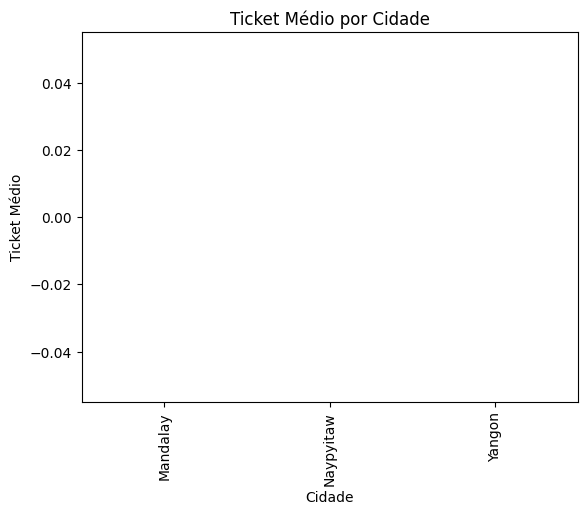

In [95]:
# Calcular o ticket médio por cidade
ticket_medio_cidade = vendas_principal.groupby('City')['total_venda'].mean().sort_values(ascending=False)

# Gráfico de barras para o ticket médio por cidade
ticket_medio_cidade.plot(kind='bar', title='Ticket Médio por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Ticket Médio')
plt.show()


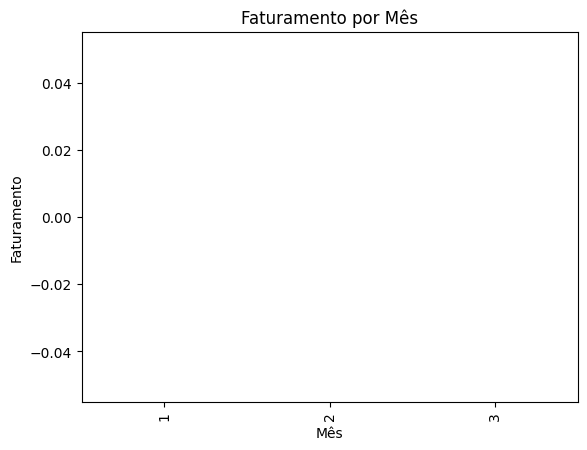

In [96]:
# Calcular o faturamento por mês
faturamento_mes = vendas_principal.groupby('mes')['total_venda'].sum()

# Gráfico de barras para o faturamento por mês
faturamento_mes.plot(kind='bar', title='Faturamento por Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.show()


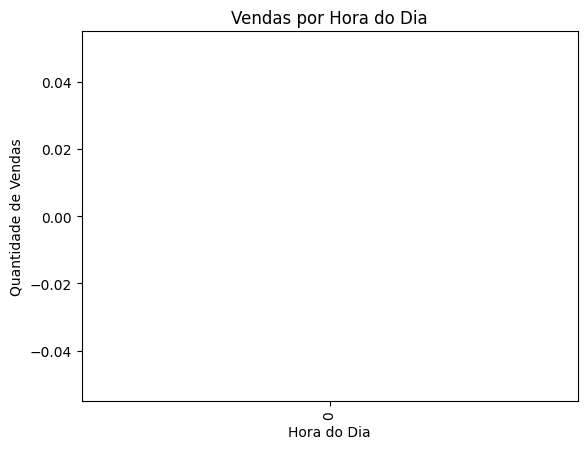

In [97]:
# Extrair a hora do dia da coluna de data
vendas_principal['hora_do_dia'] = vendas_principal['Data'].dt.hour

# Calcular o número de vendas por hora do dia
vendas_por_hora = vendas_principal.groupby('hora_do_dia')['Quantity'].sum()

# Gráfico de barras para as vendas por hora do dia
vendas_por_hora.plot(kind='bar', title='Vendas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Vendas')
plt.show()
